In [ ]:
!pip install ultralytics==8.0.196


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from ultralytics import YOLO
import os
from IPython import display
#display.clear_output()

import ultralytics
#ultralytics.checks()

from IPython.display import display, Image

In [ ]:
!nvidia-smi

Sun Aug  4 13:54:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mruF1GM852B0YhIs2li0")
project = rf.workspace("grad-tpere").project("our-plates")
version = project.version(23)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Our-Plates-23 in yolov8:: 100%|██████████| 9292/9292 [00:01<00:00, 5693.37it/s]


# Training YOLO v8

In [ ]:
model = YOLO("yolov8n.pt")  # load a pretrained model
# Train the model
model.train(data='/content/datasets/Our-Plates-23/data.yaml', epochs=30, plots=True)

100%|██████████| 6.23M/6.23M [00:00<00:00, 100MB/s]
New https://pypi.org/project/ultralytics/8.2.72 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Our-Plates-23/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2be19932b0>
fitness: 0.8986799379664957
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.88909])
names: {0: 'License Plate'}
plot: True
results_dict: {'metrics/precision(B)': 0.9905370865612323, 'metrics/recall(B)': 0.9496644295302014, 'metrics/mAP50(B)': 0.9850217760980038, 'metrics/mAP50-95(B)': 0.8890864003963281, 'fitness': 0.8986799379664957}
save_dir: PosixPath('runs/detect/train')
speed: {'preprocess': 0.24765821603628305, 'inference': 2.323849843098567, 'loss': 0.0008298800541804387, 'postprocess': 1.9282923294947698}

# Validation

In [ ]:
# Validate on separate data
metrics = model.val(data=f"{HOME}/datasets/Our-Plates-23/data.yaml")

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Our-Plates-23/valid/labels.cache... 520 images, 0 backgrounds, 0 corrupt: 100%|██████████| 520/520 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 177, len(boxes) = 596. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.05it/s]
                   all        520        596       0.99       0.95      0.985      0.892
Speed: 0.4ms preprocess, 5.2ms inference, 0.0ms

In [ ]:
print(f'Recall = {metrics.box.map}')  # mAP50-95
print(f'Precision = {metrics.box.map50}')  # mAP50
print(f'Mean Average Precision at 0.75 = {metrics.box.map75}')  # mAP75
print(f'Mean Average Precision from 0.5 to 0.95 for each category = {metrics.box.maps}')  # list of mAP50-95 for each category

Mean Average Precision from 0.5 to 0.95 = 0.8917949607399189
Mean Average Precision at 0.5= 0.9850304426118149
Mean Average Precision at 0.75 = 0.9705037970616478
Mean Average Precision from 0.5 to 0.95 for each category = [    0.89179]


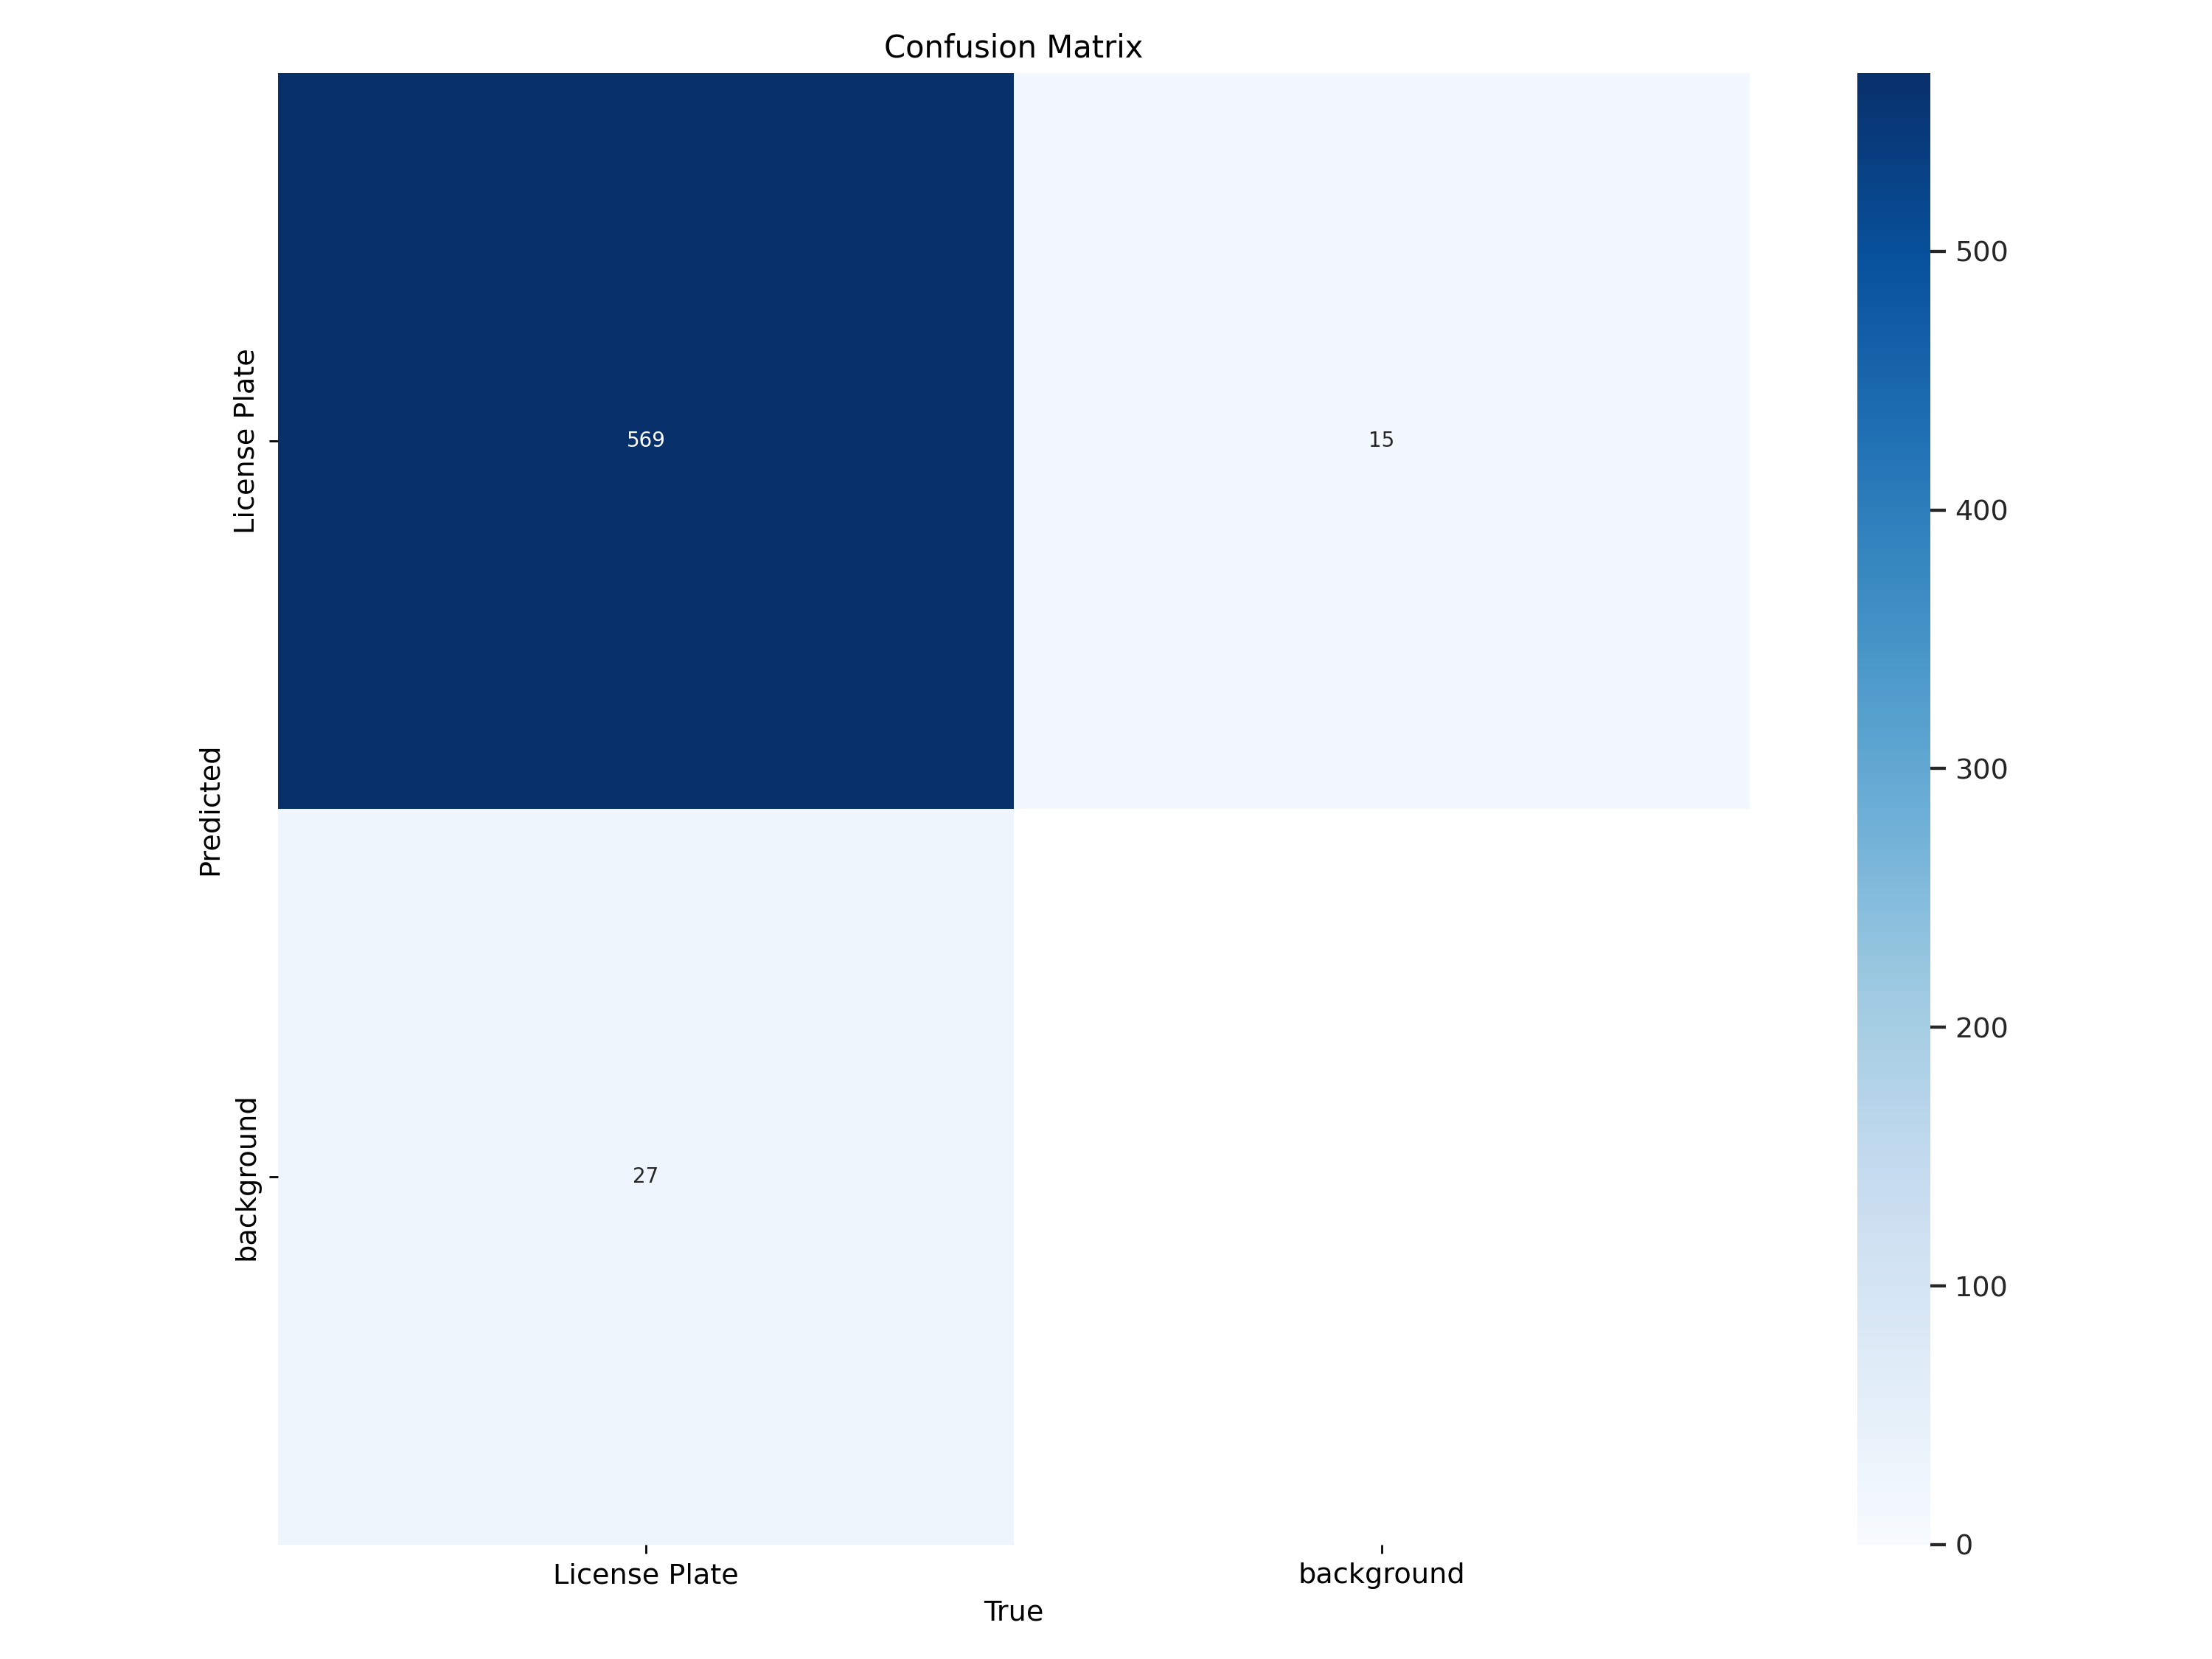

In [ ]:
Image(f'/content/datasets/runs/detect/train/confusion_matrix.png', width = 600)

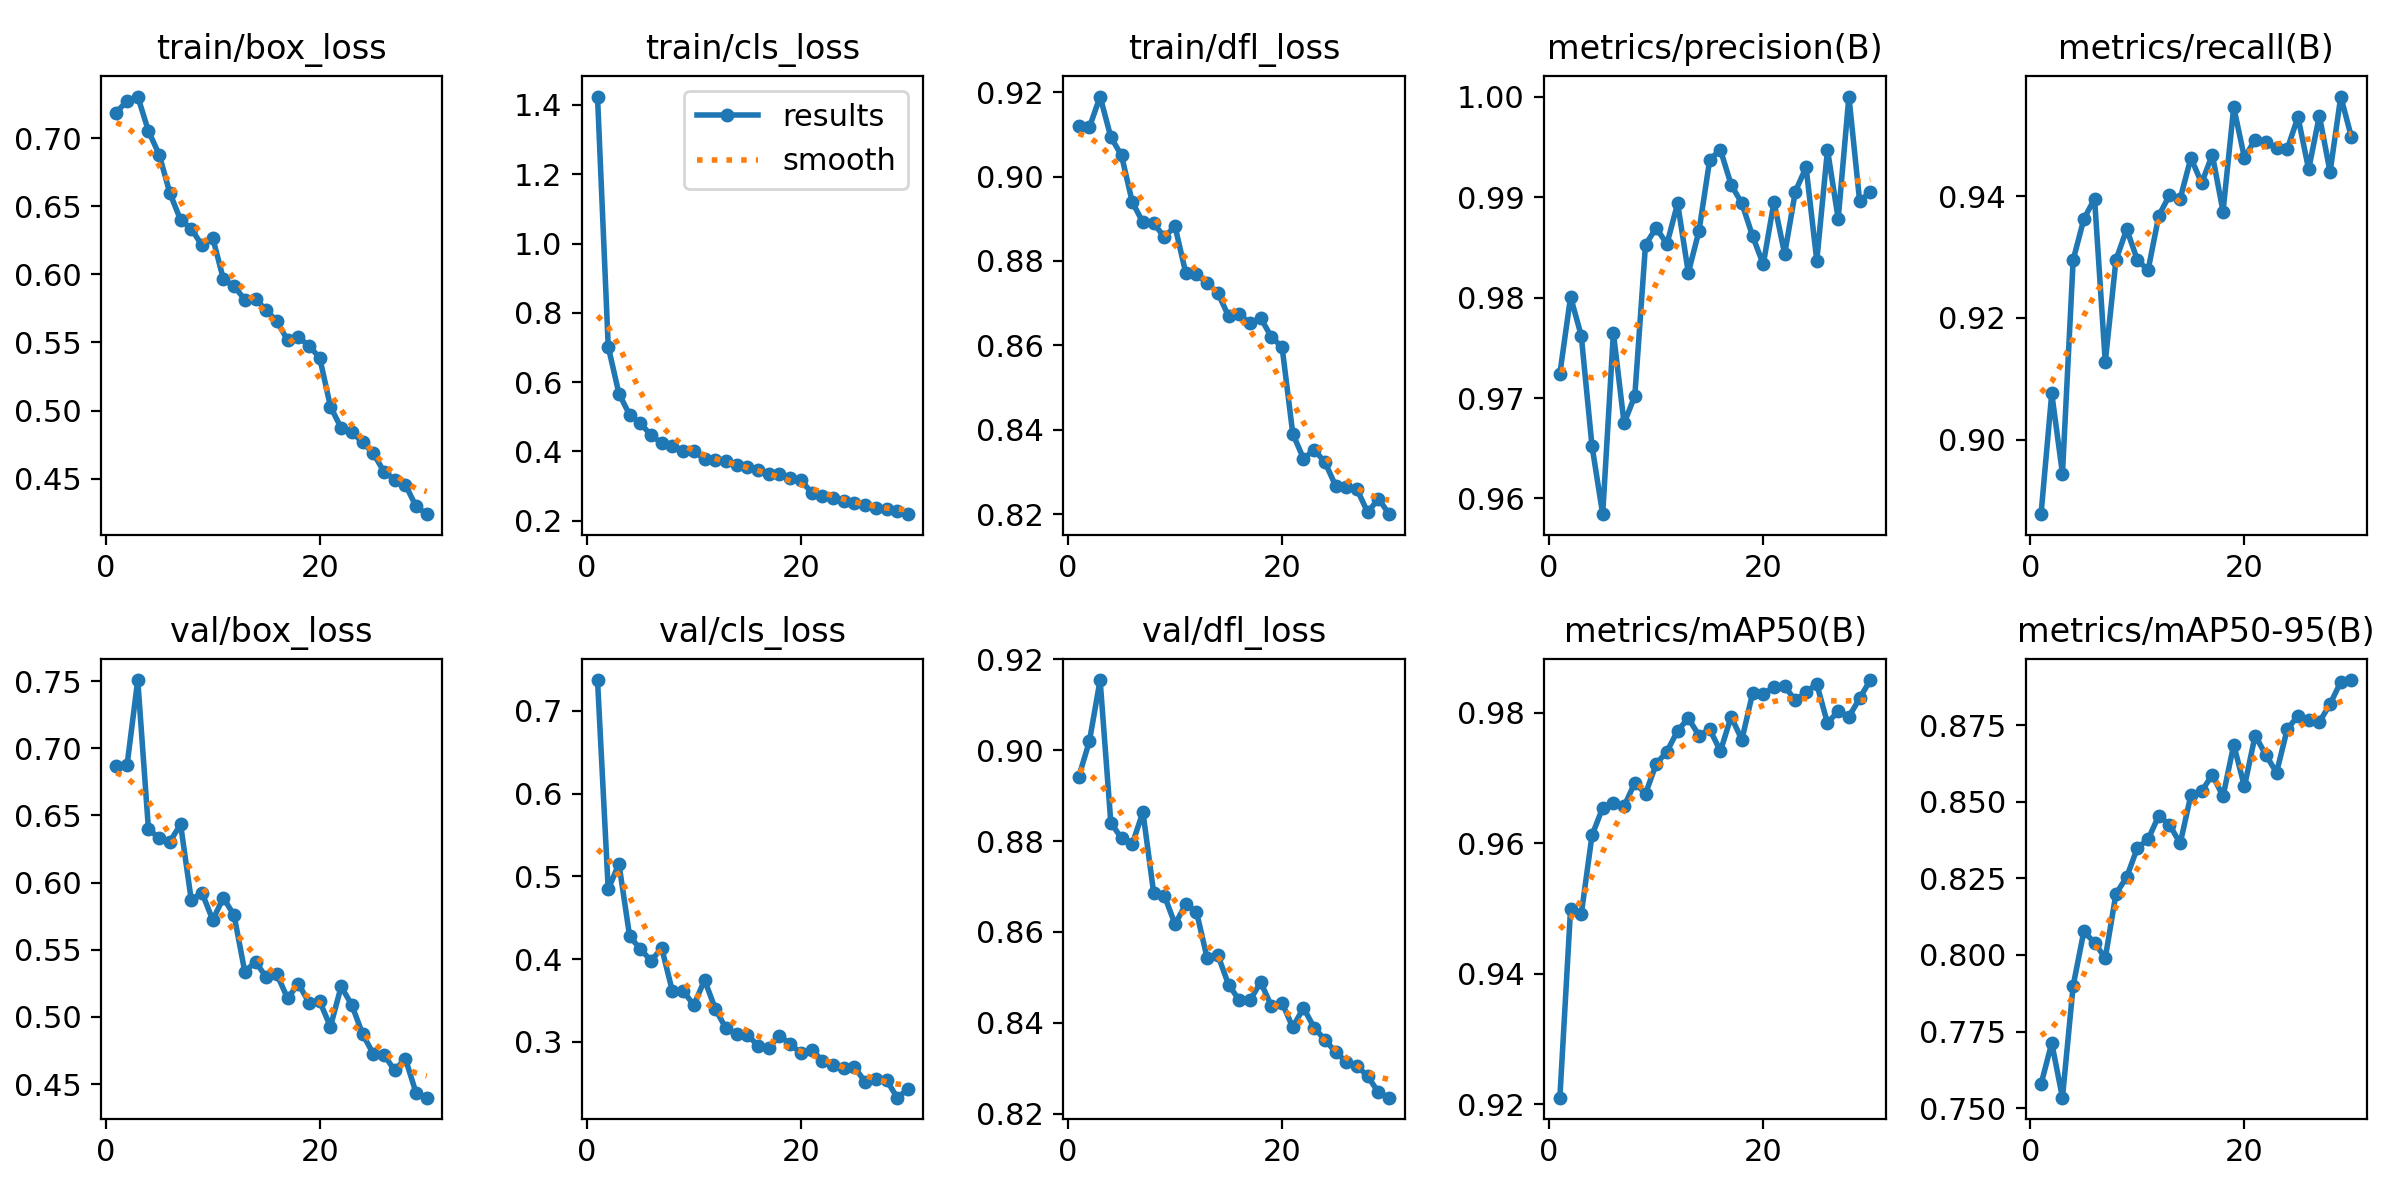

In [ ]:
Image(f'/content/datasets/runs/detect/train/results.png', width = 600)